In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict

import matplotlib.pyplot as plt
import math

import time
from datetime import timedelta, datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dataset loading and visualization

In [3]:
# To execute only the first time
#header_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'success_pred']
colonne=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kddcup.names',sep=':',skiprows=1,header=None)
print(colonne.describe(),'\n')

#header_names=colonne.iloc[:,0]
print(colonne,'\n')
attacchi=pd.DataFrame(['attack_type'])

hn=pd.concat([colonne,attacchi],ignore_index=True)
header_names=hn.iloc[:,0].tolist()

print(header_names,'\n')

               0             1
count         41            41
unique        41             2
top     duration   continuous.
freq           1            34 

                              0             1
0                      duration   continuous.
1                 protocol_type     symbolic.
2                       service     symbolic.
3                          flag     symbolic.
4                     src_bytes   continuous.
5                     dst_bytes   continuous.
6                          land     symbolic.
7                wrong_fragment   continuous.
8                        urgent   continuous.
9                           hot   continuous.
10            num_failed_logins   continuous.
11                    logged_in     symbolic.
12              num_compromised   continuous.
13                   root_shell   continuous.
14                 su_attempted   continuous.
15                     num_root   continuous.
16           num_file_creations   continuous.
17             

In [4]:
t0_import = time.monotonic()
# To execute only after data without duplication has been generated
#header_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type']
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_no_dup.csv',names=header_names)

label=data['attack_type']
data=data.drop(['attack_type'],axis=1)

t1_import = time.monotonic()

print(data.shape, (t1_import-t0_import), 'seconds')

(1074992, 41) 22.877577865000603 seconds


In [5]:
print(data.describe)
print(label.shape)
print(label.describe)

<bound method NDFrame.describe of          duration protocol_type service flag  src_bytes  dst_bytes  land  \
0               0           tcp    http   SF        215      45076     0   
1               0           tcp    http   SF        162       4528     0   
2               0           tcp    http   SF        236       1228     0   
3               0           tcp    http   SF        233       2032     0   
4               0           tcp    http   SF        239        486     0   
...           ...           ...     ...  ...        ...        ...   ...   
1074987         0           tcp    http   SF        212       2288     0   
1074988         0           tcp    http   SF        219        236     0   
1074989         0           tcp    http   SF        218       3610     0   
1074990         0           tcp    http   SF        219       1234     0   
1074991         0           tcp    http   SF        219       1098     0   

         wrong_fragment  urgent  hot  ...  dst_host_c

In [6]:
col_names = np.array(header_names)
nominal_idx = [1, 2, 3]
binary_idx = [6, 11, 13, 14, 20, 21]
numeric_idx = list(set(range(41)).difference(nominal_idx).difference(binary_idx))

print('Nominal: ',nominal_idx)
for j in nominal_idx: print(header_names[j])
print()

print('Binary: ', binary_idx)
for j in binary_idx: print(header_names[j])
print()

print('Numeric: ',numeric_idx)
for j in numeric_idx: print(header_names[j])

nominal_column=col_names[nominal_idx].tolist()
binary_column=col_names[binary_idx].tolist()
numeric_column=col_names[numeric_idx].tolist()

print('\nNumeric: ',pd.Series(numeric_column).count(), '\nBinary: ', pd.Series(binary_column).count(), '\nNominal: ',pd.Series(nominal_column).count())

Nominal:  [1, 2, 3]
protocol_type
service
flag

Binary:  [6, 11, 13, 14, 20, 21]
land
logged_in
root_shell
su_attempted
is_host_login
is_guest_login

Numeric:  [0, 4, 5, 7, 8, 9, 10, 12, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
duration
src_bytes
dst_bytes
wrong_fragment
urgent
hot
num_failed_logins
num_compromised
num_root
num_file_creations
num_shells
num_access_files
num_outbound_cmds
count
srv_count
serror_rate
srv_serror_rate
rerror_rate
srv_rerror_rate
same_srv_rate
diff_srv_rate
srv_diff_host_rate
dst_host_count
dst_host_srv_count
dst_host_same_srv_rate
dst_host_diff_srv_rate
dst_host_same_src_port_rate
dst_host_srv_diff_host_rate
dst_host_serror_rate
dst_host_srv_serror_rate
dst_host_rerror_rate
dst_host_srv_rerror_rate

Numeric:  32 
Binary:  6 
Nominal:  3


defaultdict(<class 'list'>, {'benign': ['normal.'], 'dos': ['apache2.', 'back.', 'mailbomb.', 'processtable.', 'snmpgetattack.', 'teardrop.', 'smurf.', 'land.', 'neptune.', 'pod.', 'udpstorm.'], 'u2r': ['ps.', 'buffer_overflow.', 'perl.', 'rootkit.', 'loadmodule.', 'xterm.', 'sqlattack.', 'httptunnel.'], 'r2l': ['ftp_write.', 'guess_passwd.', 'snmpguess.', 'imap.', 'spy.', 'warezclient.', 'warezmaster.', 'multihop.', 'phf.', 'imap.', 'named.', 'sendmail.', 'xlock.', 'xsnoop.', 'worm.'], 'probe': ['nmap.', 'ipsweep.', 'portsweep.', 'satan.', 'mscan.', 'saint.', 'worm.']})

Attack mapping:  {'normal.': 'benign', 'apache2.': 'dos', 'back.': 'dos', 'mailbomb.': 'dos', 'processtable.': 'dos', 'snmpgetattack.': 'dos', 'teardrop.': 'dos', 'smurf.': 'dos', 'land.': 'dos', 'neptune.': 'dos', 'pod.': 'dos', 'udpstorm.': 'dos', 'ps.': 'u2r', 'buffer_overflow.': 'u2r', 'perl.': 'u2r', 'rootkit.': 'u2r', 'loadmodule.': 'u2r', 'xterm.': 'u2r', 'sqlattack.': 'u2r', 'httptunnel.': 'u2r', 'ftp_write.':

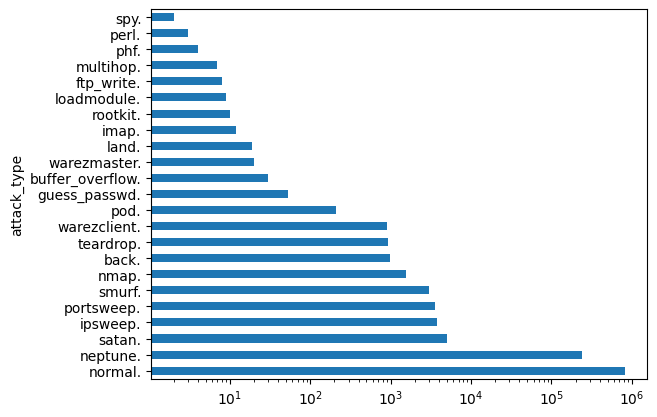

In [7]:
from collections import defaultdict
category = defaultdict(list)
category['benign'].append('normal.')
with open('/content/drive/MyDrive/Colab Notebooks/training_attack_types.txt', 'r') as ff:
    for line in ff.readlines():
        attack_name, attack_cat = line.strip().split(' ')
        category[attack_cat].append(attack_name)

print(category)

attack_mapping = dict((a,c) for c in category for a in category[c])
print('\nAttack mapping: ',attack_mapping,'\n')

attacchi=label.value_counts()
print(attacchi)
attacchi.plot(kind='barh')
plt.xscale('log')

attack_type
benign    812814
dos       247267
probe      13860
r2l          999
u2r           52
Name: count, dtype: int64


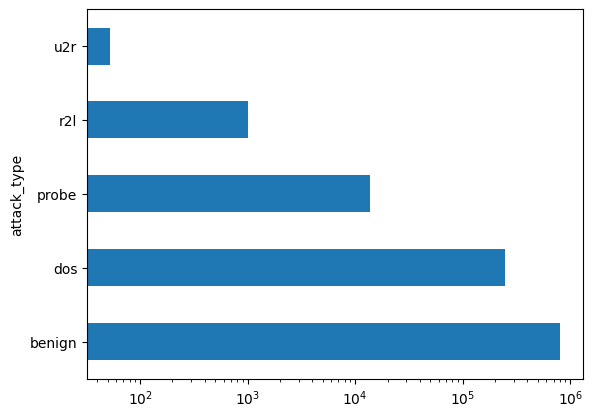

In [8]:
label_cat=label.map(lambda x: attack_mapping[x])
categorie_attacchi=label_cat.value_counts()
print(categorie_attacchi)
categorie_attacchi.plot(kind='barh')
plt.xscale('log')

# Data analysis and fixing

In [9]:
data[binary_column].describe().transpose()


count      mean       std  min  25%  50%  75%  max
land            1074992.0  0.000024  0.004918  0.0  0.0  0.0  0.0  1.0
logged_in       1074992.0  0.630116  0.482773  0.0  0.0  1.0  1.0  1.0
root_shell      1074992.0  0.000302  0.017385  0.0  0.0  0.0  0.0  1.0
su_attempted    1074992.0  0.000167  0.017253  0.0  0.0  0.0  0.0  2.0
is_host_login   1074992.0  0.000002  0.001364  0.0  0.0  0.0  0.0  1.0
is_guest_login  1074992.0  0.003803  0.061550  0.0  0.0  0.0  0.0  1.0

In [10]:
data[nominal_column].describe().transpose()

count unique   top    freq
protocol_type  1074992      3   tcp  978540
service        1074992     70  http  580507
flag           1074992     11    SF  786840

In [11]:
data['protocol_type'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [12]:
data[numeric_column].describe().transpose()

count         mean           std  min    25%  \
duration                     1074992.0   134.890835  1.321605e+03  0.0   0.00   
src_bytes                    1074992.0  5837.540050  2.009617e+06  0.0   0.00   
dst_bytes                    1074992.0  4873.729754  1.376866e+06  0.0   0.00   
wrong_fragment               1074992.0     0.002736  8.835986e-02  0.0   0.00   
urgent                       1074992.0     0.000036  1.540162e-02  0.0   0.00   
hot                          1074992.0     0.054279  9.974618e-01  0.0   0.00   
num_failed_logins            1074992.0     0.000146  1.558112e-02  0.0   0.00   
num_compromised              1074992.0     0.035708  8.232096e+00  0.0   0.00   
num_root                     1074992.0     0.058753  8.406153e+00  0.0   0.00   
num_file_creations           1074992.0     0.005417  2.650495e-01  0.0   0.00   
num_shells                   1074992.0     0.000339  1.864927e-02  0.0   0.00   
num_access_files             1074992.0     0.004320  7.347828e-02  0.0   0.00   
num_outbound_cmds            1074992.0     0.000000  0.000000e+00  0.0   0.00   
count                        1074992.0    49.345443  8.523218e+01  0.0   2.00   
srv_count                    1074992.0    12.979608  2.941398e+01  0.0   2.00   
serror_rate                  1074992.0     0.190117  3.909777e-01  0.0   0.00   
srv_serror_rate              1074992.0     0.190807  3.916605e-01  0.0   0.00   
rerror_rate                  1074992.0     0.078117  2.669225e-01  0.0   0.00   
srv_rerror_rate              1074992.0     0.077930  2.659105e-01  0.0   0.00   
same_srv_rate                1074992.0     0.778566  3.917200e-01  0.0   1.00   
diff_srv_rate                1074992.0     0.031600  1.169086e-01  0.0   0.00   
srv_diff_host_rate           1074992.0     0.117907  2.655164e-01  0.0   0.00   
dst_host_count               1074992.0   161.972337  1.022645e+02  0.0  50.00   
dst_host_srv_count           1074992.0   159.209141  1.098842e+02  0.0  18.00   
dst_host_same_srv_rate       1074992.0     0.670094  4.259518e-01  0.0   0.07   
dst_host_diff_srv_rate       1074992.0     0.049499  1.310801e-01  0.0   0.00   
dst_host_same_src_port_rate  1074992.0     0.093358  2.298291e-01  0.0   0.00   
dst_host_srv_diff_host_rate  1074992.0     0.021736  5.636309e-02  0.0   0.00   
dst_host_serror_rate         1074992.0     0.190658  3.907621e-01  0.0   0.00   
dst_host_srv_serror_rate     1074992.0     0.190130  3.913478e-01  0.0   0.00   
dst_host_rerror_rate         1074992.0     0.079541  2.621995e-01  0.0   0.00   
dst_host_srv_rerror_rate     1074992.0     0.078297  2.609840e-01  0.0   0.00   

                                50%      75%           max  
duration                       0.00     0.00  5.832900e+04  
src_bytes                    219.00   306.00  1.379964e+09  
dst_bytes                    332.00  1721.00  1.309937e+09  
wrong_fragment                 0.00     0.00  3.000000e+00  
urgent                         0.00     0.00  1.400000e+01  
hot                            0.00     0.00  7.700000e+01  
num_failed_logins              0.00     0.00  5.000000e+00  
num_compromised                0.00     0.00  7.479000e+03  
num_root                       0.00     0.00  7.468000e+03  
num_file_creations             0.00     0.00  4.300000e+01  
num_shells                     0.00     0.00  2.000000e+00  
num_access_files               0.00     0.00  9.000000e+00  
num_outbound_cmds              0.00     0.00  0.000000e+00  
count                          8.00    34.00  5.110000e+02  
srv_count                      7.00    15.00  5.110000e+02  
serror_rate                    0.00     0.00  1.000000e+00  
srv_serror_rate                0.00     0.00  1.000000e+00  
rerror_rate                    0.00     0.00  1.000000e+00  
srv_rerror_rate                0.00     0.00  1.000000e+00  
same_srv_rate                  1.00     1.00  1.000000e+00  
diff_srv_rate                  0.00     0.01  1.000000e+00  
srv_diff_host_rat

In [13]:
# In the category 'su_attempted' the maximum is 2 altough it is binary, we have to fix it
data.groupby(['su_attempted']).size()


su_attempted
0    1074882
1         40
2         70
dtype: int64

In [14]:
data['su_attempted'].replace(2,1,inplace=True)
data.groupby(['su_attempted']).size()

<ipython-input-14-66dd9a2535d1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['su_attempted'].replace(2,1,inplace=True)


su_attempted
0    1074882
1        110
dtype: int64

In [15]:
# In the category 'num_outbound_cmds' the maximum count is 0, thus we can safely remove it
data.groupby(['num_outbound_cmds']).size()


num_outbound_cmds
0    1074992
dtype: int64

In [16]:
data.drop('num_outbound_cmds', axis=1, inplace=True)
ind=numeric_column.index('num_outbound_cmds')
numeric_column.remove('num_outbound_cmds')
numeric_idx.remove(ind)

In [17]:
print('Numeric: ',pd.Series(numeric_column).count(), '\nBinary: ', pd.Series(binary_column).count(), '\nNominal: ',pd.Series(nominal_column).count())

Numeric:  31 
Binary:  6 
Nominal:  3


# Data preparation

In [18]:
data_raw = pd.get_dummies(data, columns=nominal_column)#, drop_first=True)


In [19]:
data.shape

(1074992, 40)

In [20]:
data_raw.shape

(1074992, 121)

In [21]:
dummy_variables = list(set(data_raw) - set(data))
print(dummy_variables)

['flag_SH', 'flag_SF', 'flag_S3', 'service_X11', 'service_gopher', 'service_http_8001', 'service_remote_job', 'service_supdup', 'service_hostnames', 'service_pop_2', 'service_exec', 'service_time', 'service_red_i', 'service_tim_i', 'service_sunrpc', 'service_daytime', 'flag_S1', 'service_netbios_dgm', 'service_whois', 'service_nnsp', 'service_ftp', 'service_domain', 'service_urh_i', 'service_private', 'flag_RSTOS0', 'service_ntp_u', 'service_auth', 'service_bgp', 'service_http_2784', 'service_finger', 'service_telnet', 'service_aol', 'service_mtp', 'flag_RSTO', 'service_tftp_u', 'flag_OTH', 'service_http_443', 'service_ftp_data', 'service_csnet_ns', 'protocol_type_udp', 'service_sql_net', 'service_efs', 'service_other', 'protocol_type_icmp', 'service_uucp_path', 'service_echo', 'service_ldap', 'flag_S0', 'service_klogin', 'service_systat', 'flag_REJ', 'service_http', 'service_iso_tsap', 'service_login', 'service_netbios_ssn', 'service_harvest', 'service_IRC', 'service_link', 'service_v

In [22]:
print(list(data_raw),'\n')
print(data_raw.shape)

['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'servic

(1074992, 40) 50.32893597600014 seconds


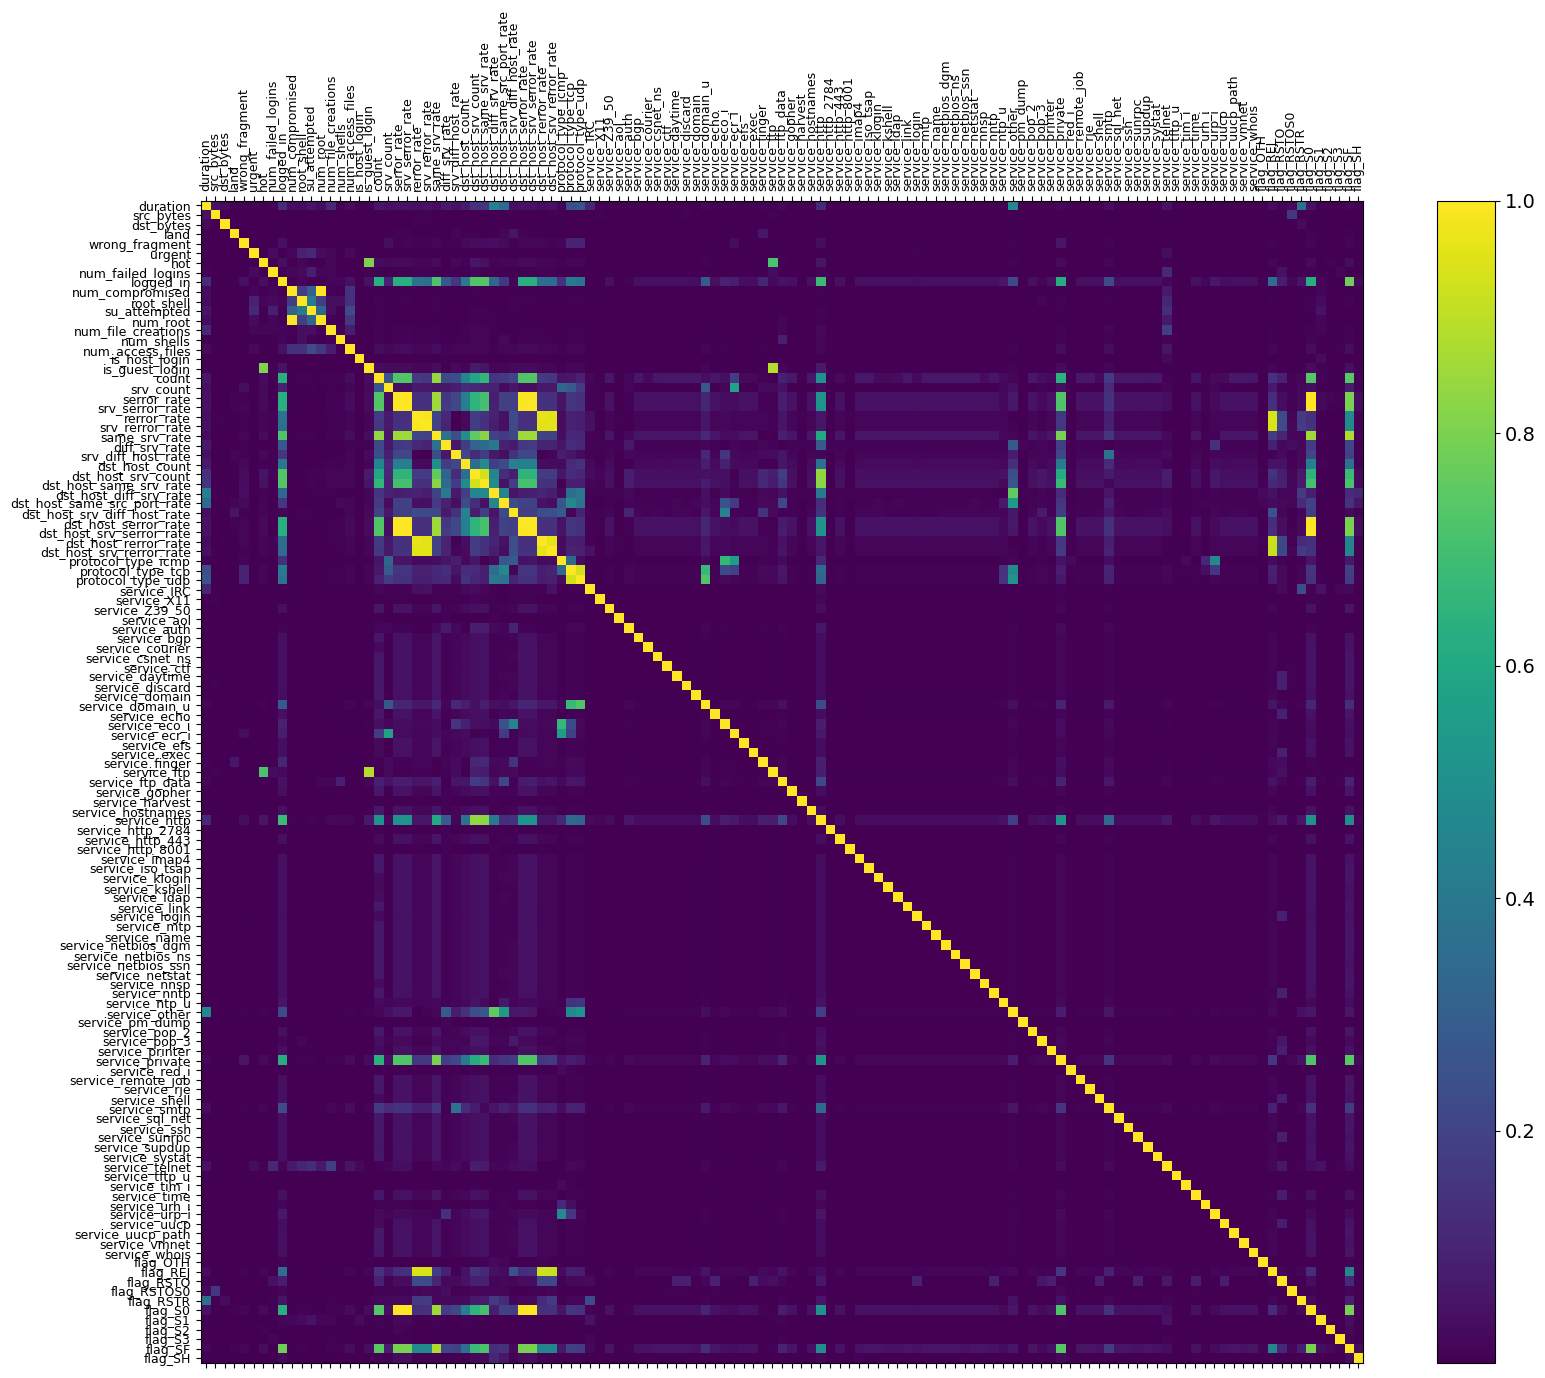

In [23]:
t0_import = time.monotonic()


f = plt.figure(figsize=(19, 15))
plt.matshow(abs(data_raw.corr()), fignum=f.number)
plt.xticks(np.arange(0, data_raw.shape[1], step=1),labels=list(data_raw), fontsize=9, rotation=90)
plt.yticks(np.arange(0, data_raw.shape[1], step=1),labels=list(data_raw), fontsize=9)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

t1_import = time.monotonic()
print(data.shape, (t1_import-t0_import), 'seconds')

In [24]:
train_count=int(0.8 * len(data_raw))

In [25]:
print(train_count,len(data_raw))

859993 1074992


In [26]:
train_data = data_raw.iloc[:train_count]
train_label = label.iloc[:train_count]
train_label_cat = label_cat.iloc[:train_count]

test_data = data_raw.iloc[train_count:]
test_label = label.iloc[train_count:]
test_label_cat = label_cat.iloc[train_count:]

print(train_data.shape,test_data.shape,train_data.shape[0]+test_data.shape[0])

(859993, 121) (214999, 121) 1074992


In [27]:
train_data[numeric_column].describe().transpose()

count         mean           std  min    25%  \
duration                     859993.0    79.577117  1.156037e+03  0.0   0.00   
src_bytes                    859993.0  2608.015948  7.581716e+05  0.0  31.00   
dst_bytes                    859993.0  5623.007122  1.539337e+06  0.0   0.00   
wrong_fragment               859993.0     0.001840  7.253814e-02  0.0   0.00   
urgent                       859993.0     0.000029  8.282780e-03  0.0   0.00   
hot                          859993.0     0.058298  1.042274e+00  0.0   0.00   
num_failed_logins            859993.0     0.000164  1.673942e-02  0.0   0.00   
num_compromised              859993.0     0.039182  9.086160e+00  0.0   0.00   
num_root                     859993.0     0.062120  9.252109e+00  0.0   0.00   
num_file_creations           859993.0     0.005307  2.540287e-01  0.0   0.00   
num_shells                   859993.0     0.000356  1.910479e-02  0.0   0.00   
num_access_files             859993.0     0.004106  7.197015e-02  0.0   0.00   
count                        859993.0    44.348137  8.172888e+01  0.0   2.00   
srv_count                    859993.0    13.199656  2.879037e+01  0.0   2.00   
serror_rate                  859993.0     0.188251  3.893932e-01  0.0   0.00   
srv_serror_rate              859993.0     0.189196  3.903584e-01  0.0   0.00   
rerror_rate                  859993.0     0.042155  1.988350e-01  0.0   0.00   
srv_rerror_rate              859993.0     0.041767  1.973805e-01  0.0   0.00   
same_srv_rate                859993.0     0.814771  3.699688e-01  0.0   1.00   
diff_srv_rate                859993.0     0.025365  1.091274e-01  0.0   0.00   
srv_diff_host_rate           859993.0     0.124744  2.693212e-01  0.0   0.00   
dst_host_count               859993.0   154.838679  1.030743e+02  0.0  43.00   
dst_host_srv_count           859993.0   172.032661  1.058144e+02  0.0  40.00   
dst_host_same_srv_rate       859993.0     0.721427  4.041687e-01  0.0   0.32   
dst_host_diff_srv_rate       859993.0     0.038212  1.103168e-01  0.0   0.00   
dst_host_same_src_port_rate  859993.0     0.083895  2.097125e-01  0.0   0.00   
dst_host_srv_diff_host_rate  859993.0     0.023149  5.770196e-02  0.0   0.00   
dst_host_serror_rate         859993.0     0.188661  3.892757e-01  0.0   0.00   
dst_host_srv_serror_rate     859993.0     0.188483  3.901742e-01  0.0   0.00   
dst_host_rerror_rate         859993.0     0.043097  1.935715e-01  0.0   0.00   
dst_host_srv_rerror_rate     859993.0     0.041931  1.930876e-01  0.0   0.00   

                                50%      75%           max  
duration                       0.00     0.00  5.832900e+04  
src_bytes                    225.00   308.00  6.933756e+08  
dst_bytes                    384.00  2025.00  1.309937e+09  
wrong_fragment                 0.00     0.00  3.000000e+00  
urgent                         0.00     0.00  5.000000e+00  
hot                            0.00     0.00  7.700000e+01  
num_failed_logins              0.00     0.00  5.000000e+00  
num_compromised                0.00     0.00  7.479000e+03  
num_root                       0.00     0.00  7.468000e+03  
num_file_creations             0.00     0.00  4.000000e+01  
num_shells                     0.00     0.00  2.000000e+00  
num_access_files               0.00     0.00  9.000000e+00  
count                          7.00    25.00  5.110000e+02  
srv_count                      7.00    16.00  5.110000e+02  
serror_rate                    0.00     0.00  1.000000e+00  
srv_serror_rate                0.00     0.00  1.000000e+00  
rerror_rate                    0.00     0.00  1.000000e+00  
srv_rerror_rate                0.00     0.00  1.000000e+00  
same_srv_rate                  1.00     1.00  1.000000e+00  
diff_srv_rate                  0.00     0.00  1.000000e+00  
srv_diff_host_rate             0.00     0.11  1.000000e+00  
dst_host_count               185.00   255.00  2.550000e+02  
dst_host_srv_count           255.00   255.00  2.550000e+02  
dst_hos

attack_type
normal.             129732
neptune.             82071
smurf.                1269
ipsweep.               654
portsweep.             625
teardrop.              422
pod.                    99
back.                   97
buffer_overflow.        15
satan.                   7
rootkit.                 3
land.                    3
loadmodule.              1
phf.                     1
Name: count, dtype: int64


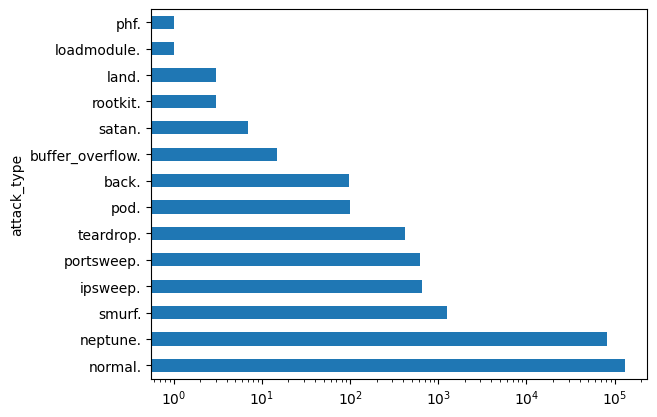

In [28]:
test_attacchi=test_label.value_counts()
print(test_attacchi)
test_attacchi.plot(kind='barh')
plt.xscale('log')

attack_type
benign    129732
dos        83961
probe       1286
u2r           19
r2l            1
Name: count, dtype: int64


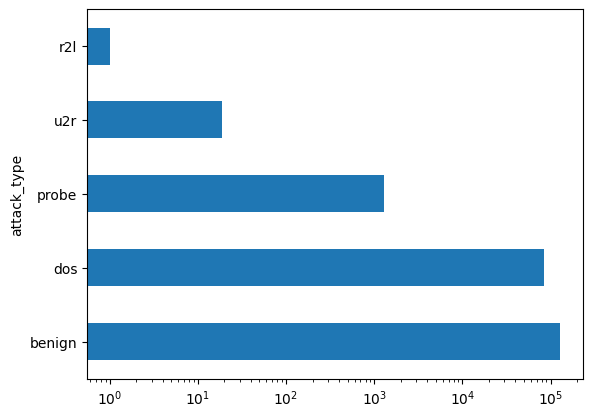

In [29]:
test_categorie_attacchi=test_label_cat.value_counts()
print(test_categorie_attacchi)
test_categorie_attacchi.plot(kind='barh')
plt.xscale('log')

attack_type
benign    683082
dos       163306
probe      12574
r2l          998
u2r           33
Name: count, dtype: int64


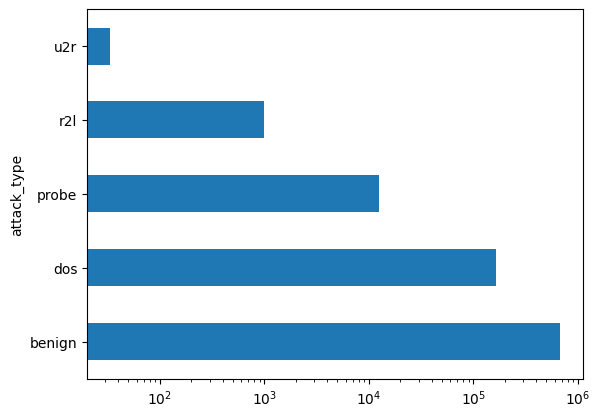

In [30]:
train_categorie_attacchi=train_label_cat.value_counts()
print(train_categorie_attacchi)
train_categorie_attacchi.plot(kind='barh')
plt.xscale('log')

attack_type
normal.             683082
neptune.            160078
satan.                5012
ipsweep.              3069
portsweep.            2939
smurf.                1738
nmap.                 1554
warezclient.           893
back.                  871
teardrop.              496
pod.                   107
guess_passwd.           53
warezmaster.            20
land.                   16
buffer_overflow.        15
imap.                   12
ftp_write.               8
loadmodule.              8
multihop.                7
rootkit.                 7
phf.                     3
perl.                    3
spy.                     2
Name: count, dtype: int64


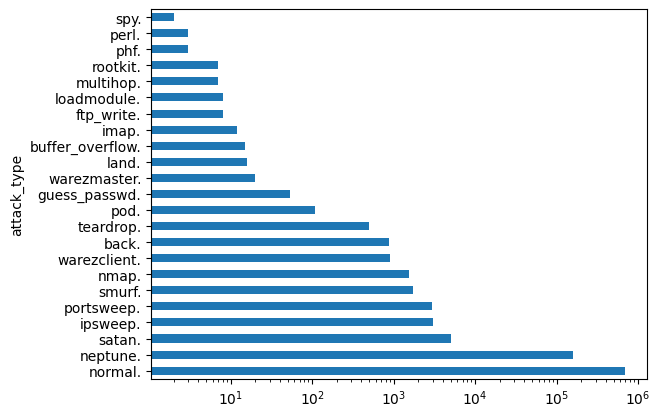

In [31]:
train_attacchi=train_label.value_counts()
print(train_attacchi)
train_attacchi.plot(kind='barh')
plt.xscale('log')

# Classification

In [32]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

t0 = time.monotonic()
classifier_DT = DecisionTreeClassifier(criterion='entropy',random_state=42)
classifier_DT.fit(train_data,train_label_cat)
t1 = time.monotonic()
pred_label_cat = classifier_DT.predict(test_data)
t2 = time.monotonic()
results = confusion_matrix(test_label_cat,pred_label_cat)
error = zero_one_loss(test_label_cat,pred_label_cat)
print('\nTraining: ',(t1-t0),'seconds\nClassification: ',(t2-t1),'seconds')


Training:  10.772598439999456 seconds
Classification:  0.14480985299996973 seconds


[[129081     15     57    573      6]
 [  1496  42214  40251      0      0]
 [    17      0   1269      0      0]
 [     0      0      0      1      0]
 [    10      0      1      4      4]] 
Error:  0.19734975511514008


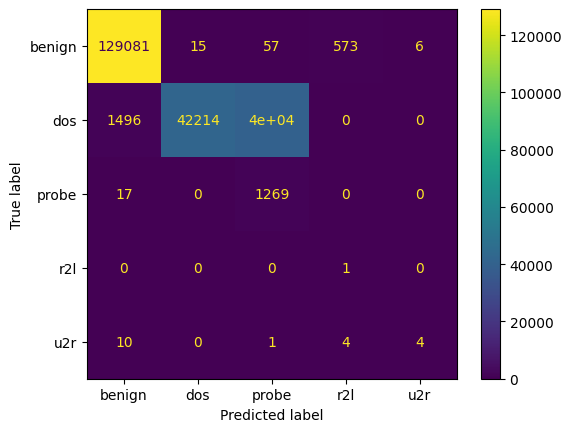

In [33]:
print(results,'\nError: ',error)

disp = ConfusionMatrixDisplay(confusion_matrix=results, display_labels=classifier_DT.classes_)
disp.plot()
plt.show()


In [34]:
# For evaluating the precision, read the matrix by column
precision_DT=precision_score(test_label_cat,pred_label_cat,average=None)
precision_DT_aggr=precision_score(test_label_cat,pred_label_cat,average='micro')
#precision_score(test_label_cat,pred_label_cat,average='macro')
#precision_score(test_label_cat,pred_label_cat,average='weighted')

print('Precision per class: ',precision_DT,'\nPrecision aggregated:', precision_DT_aggr)

Precision per class:  [0.9883388  0.99964479 0.03052095 0.0017301  0.4       ] 
Precision aggregated: 0.8026502448848599


In [35]:
# For evaluating the recall, read the matrix by row
recall_DT=recall_score(test_label_cat,pred_label_cat,average=None)
recall_DT_aggr=recall_score(test_label_cat,pred_label_cat,average='micro')
#precision_score(test_label_cat,pred_label_cat,average='macro')
#precision_score(test_label_cat,pred_label_cat,average='weighted')
print('Recall per class:', recall_DT,'\nRecall aggregated: ',recall_DT_aggr)

Recall per class: [0.99498196 0.50278105 0.98678072 1.         0.21052632] 
Recall aggregated:  0.8026502448848599


In [36]:
classifier_DT.get_depth()

21

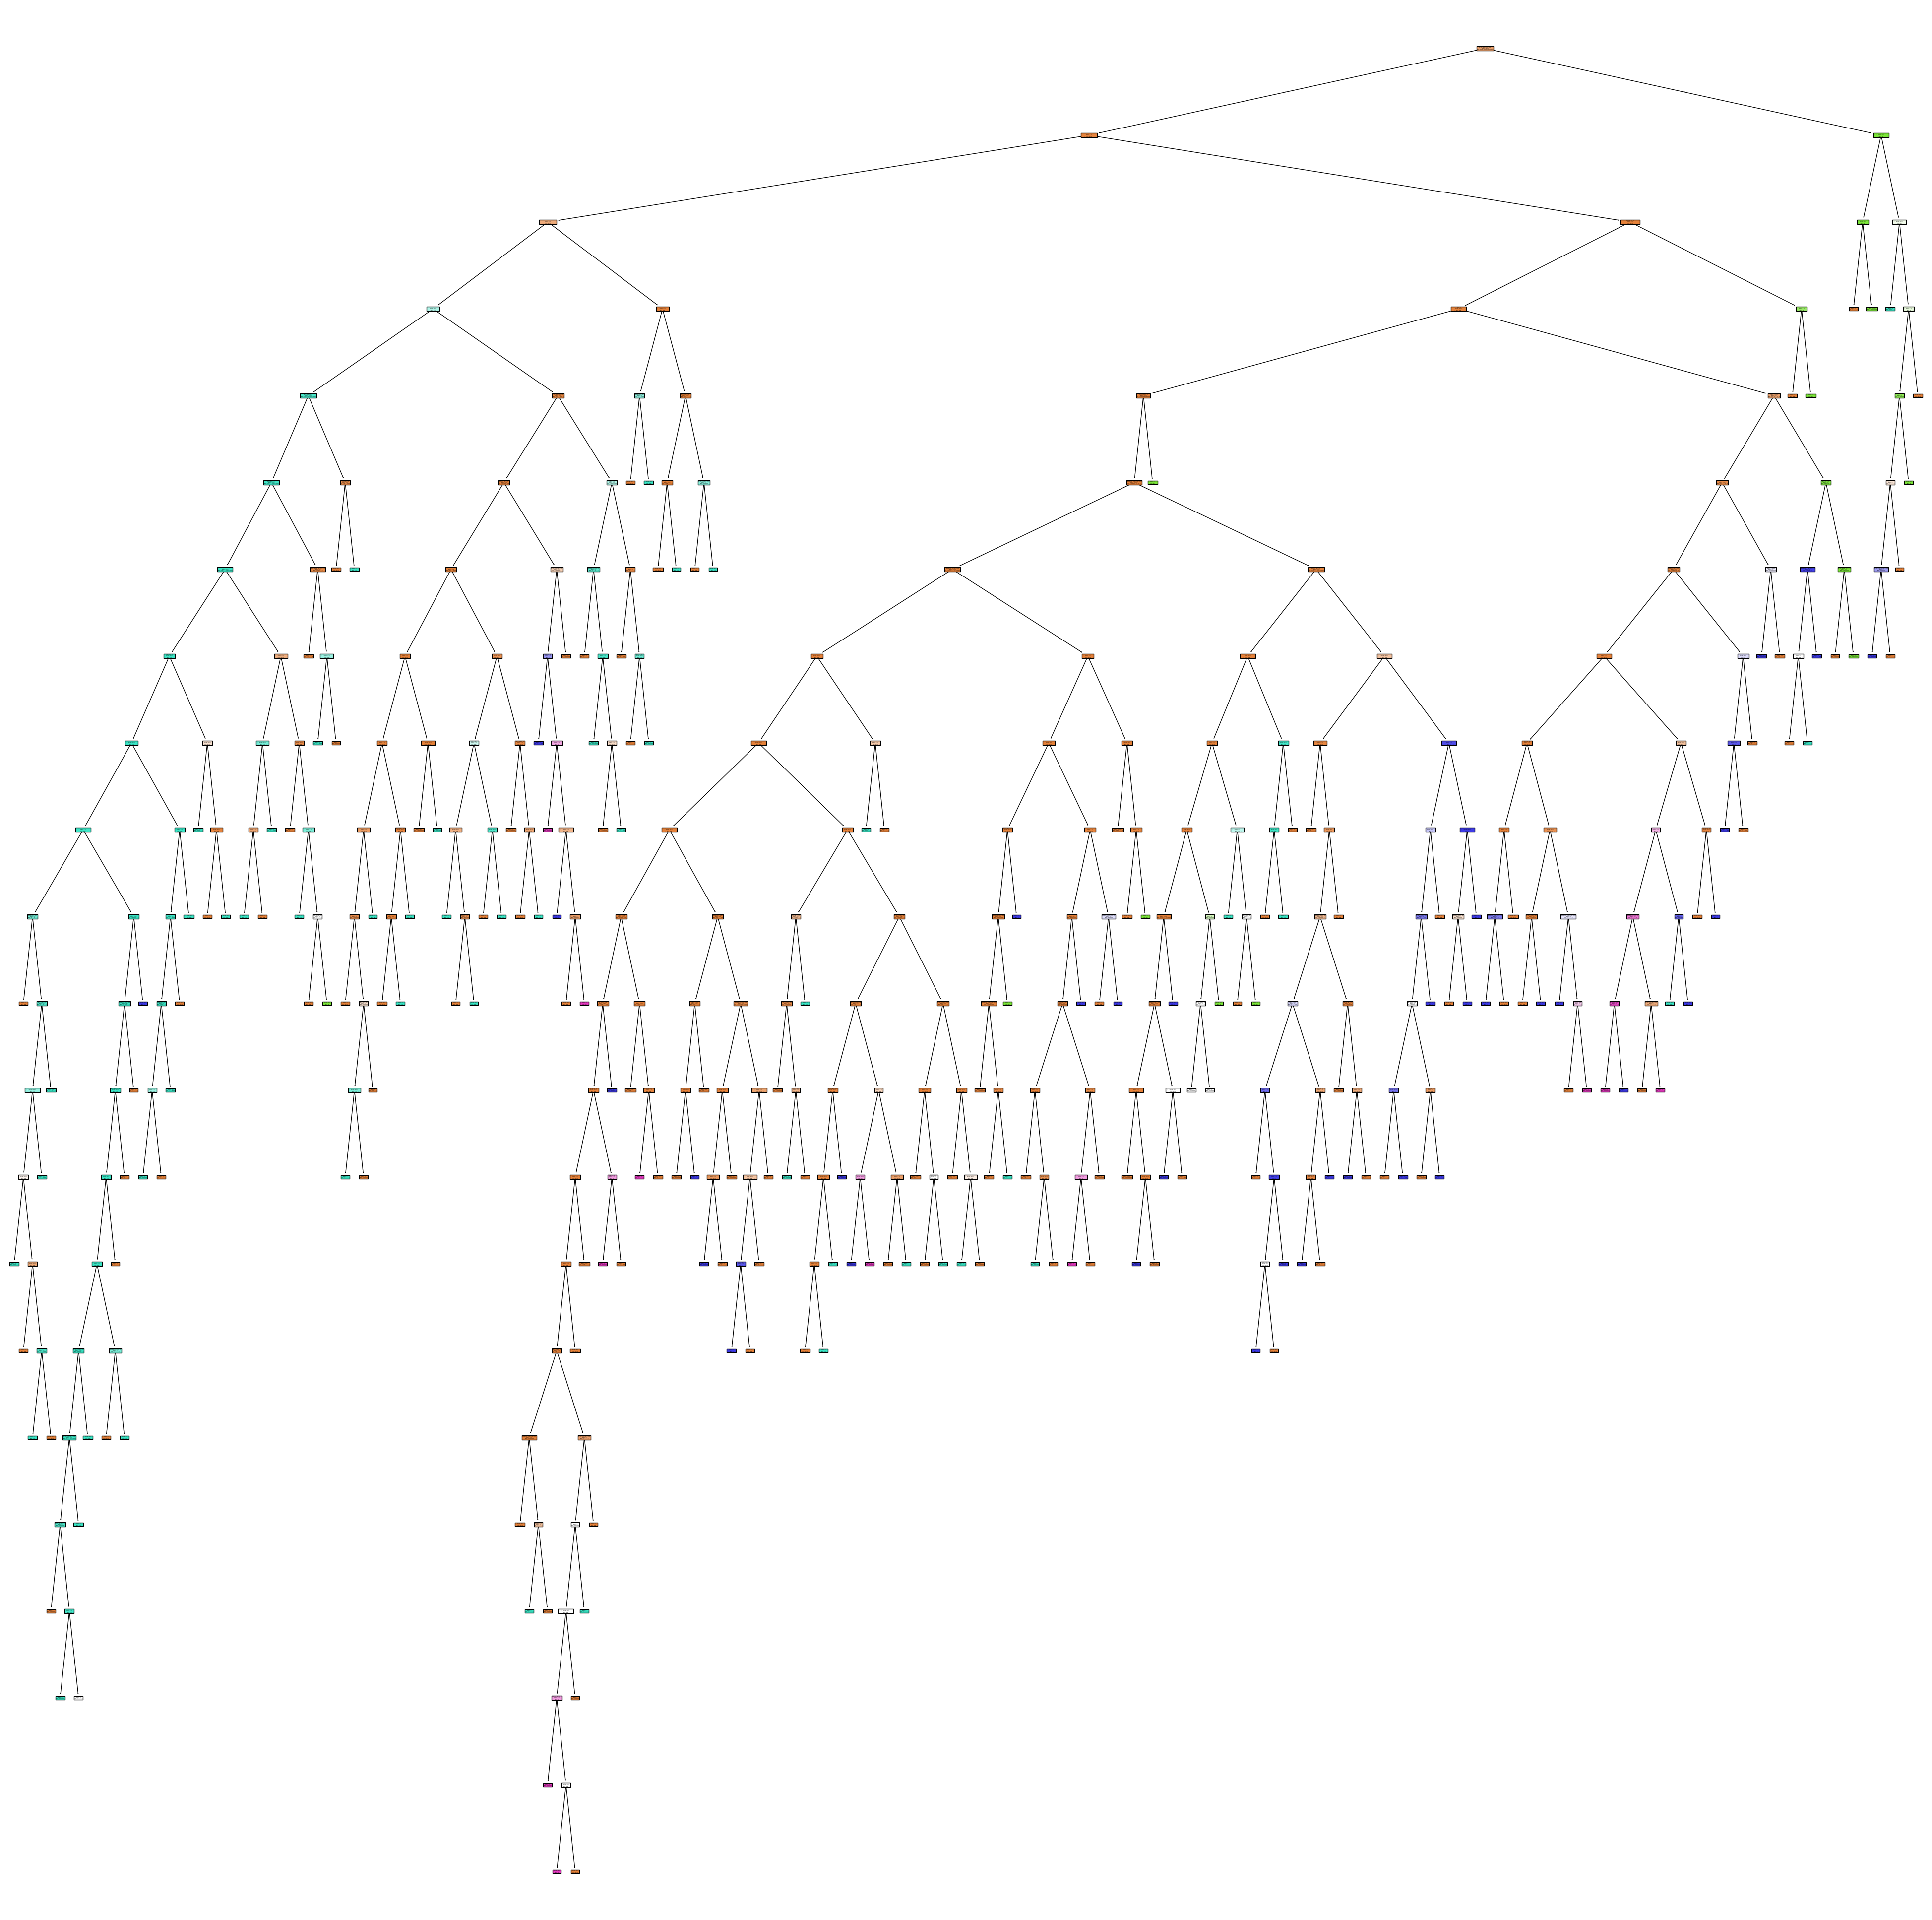

In [45]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(50,50))
_ = tree.plot_tree(classifier_DT, feature_names=classifier_DT.feature_names_in_,  class_names=classifier_DT.classes_, filled=True)

In [37]:
#complessita = cost_complexity_pruning_path(classifier_DT, test_data, test_label_cat)


#clf = DecisionTreeClassifier(random_state=0)
path = classifier_DT.cost_complexity_pruning_path(train_data,train_label_cat)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

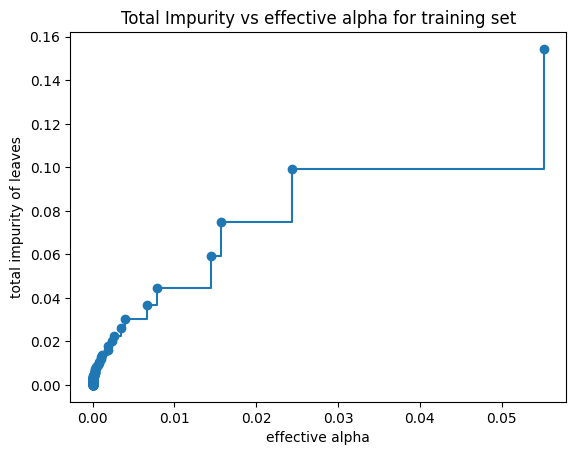

In [38]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [50]:
ccp_values=[0, 0.001, 0.002, 0.005, 0.01, 0.02, 0.03, 0.05]

In [52]:
clfs = []
#for ccp_alpha in ccp_alphas:
for ccp_alpha in ccp_values:
    #print('ccp_alpha: ',ccp_alpha)
    clf = DecisionTreeClassifier(criterion='entropy',random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(train_data,train_label_cat)
    test_scores = clf.score(test_data, test_label_cat)
    clfs.append(clf)
    print(    "Number of nodes in the tree with ccp_alpha {} is {} , depth {} or {}, and score {}".format(
        ccp_alpha, clf.tree_.node_count,  clf.tree_.max_depth, clf.get_depth(), test_scores )  )
    #fig = plt.figure(figsize=(50,50))
    #_ = tree.plot_tree(clf, feature_names=clf.feature_names_in_,  class_names=clf.classes_, filled=True)



Number of nodes in the tree with ccp_alpha 0 is 423 , depth 21 or 21, and score 0.8026502448848599
Number of nodes in the tree with ccp_alpha 0.001 is 33 , depth 8 or 8, and score 0.8053525830352699
Number of nodes in the tree with ccp_alpha 0.002 is 23 , depth 7 or 7, and score 0.8085572491034843
Number of nodes in the tree with ccp_alpha 0.005 is 15 , depth 5 or 5, and score 0.8074642207638175
Number of nodes in the tree with ccp_alpha 0.01 is 11 , depth 4 or 4, and score 0.8055014209368415
Number of nodes in the tree with ccp_alpha 0.02 is 7 , depth 3 or 3, and score 0.792785082721315
Number of nodes in the tree with ccp_alpha 0.03 is 5 , depth 2 or 2, and score 0.7944502067451477
Number of nodes in the tree with ccp_alpha 0.05 is 5 , depth 2 or 2, and score 0.7944502067451477


In [58]:
indice=1

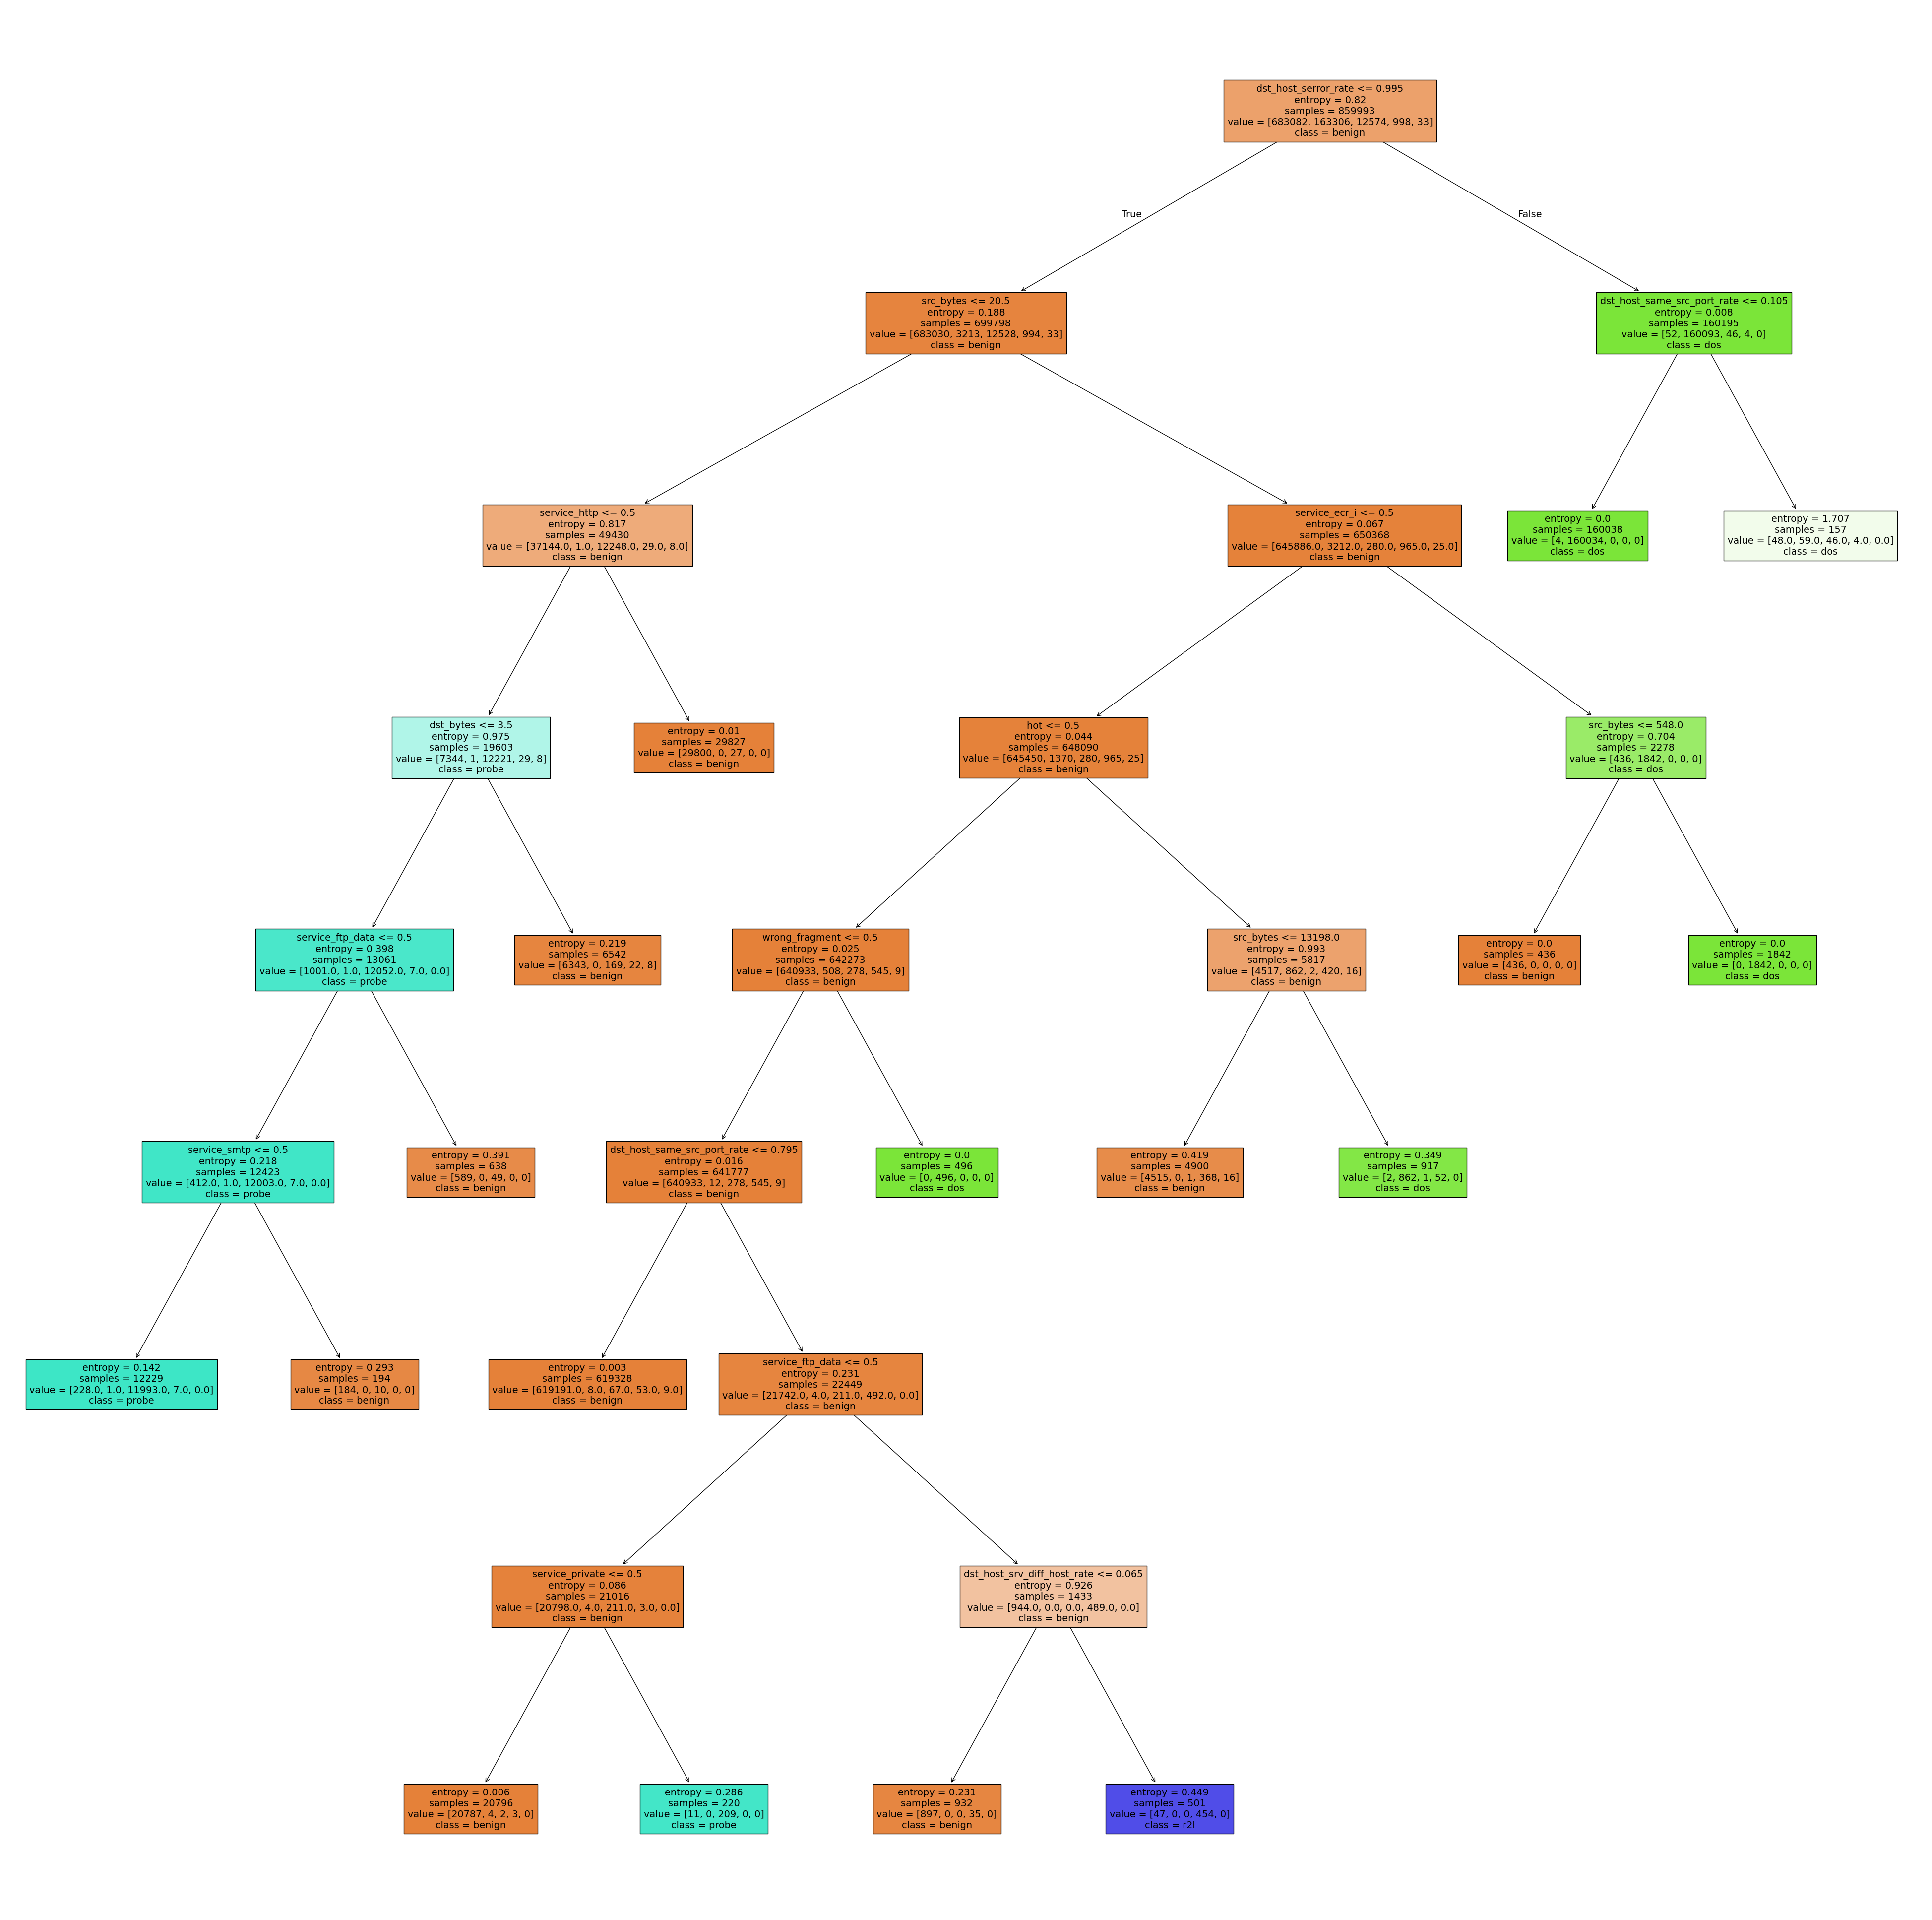

In [59]:
fig = plt.figure(figsize=(50,50))
_ = tree.plot_tree(clfs[indice], feature_names=clfs[indice].feature_names_in_,  class_names=clfs[indice].classes_, filled=True)

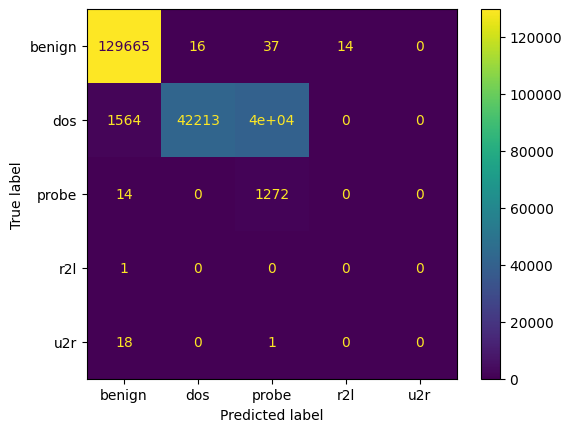

In [60]:
pred_label_cat_pruned = clfs[indice].predict(test_data)
results_pruned = confusion_matrix(test_label_cat,pred_label_cat_pruned)
error_pruned = zero_one_loss(test_label_cat,pred_label_cat_pruned)
disp = ConfusionMatrixDisplay(confusion_matrix=results_pruned, display_labels=clfs[indice].classes_)
disp.plot()
plt.show()

## Let's try with Regularization of numeric data to see if classification improves

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#train_data_std = train_data
#test_data_std = test_data

train_data_std = train_data.copy()
test_data_std = test_data.copy()

scaler = MinMaxScaler().fit(train_data_std[numeric_column])

#train_data_std.loc[:,numeric_column] = standard_scaler.transform(train_data_std[numeric_column])
#test_data_std.loc[:,numeric_column] = standard_scaler.transform(test_data_std[numeric_column])

train_data_std[numeric_column] = scaler.transform(train_data_std[numeric_column])
test_data_std[numeric_column] = scaler.transform(test_data_std[numeric_column])


In [ ]:
train_data_std[binary_column].describe().transpose()


count      mean       std  min  25%  50%  75%  max
land            859993.0  0.000019  0.004313  0.0  0.0  0.0  0.0  1.0
logged_in       859993.0  0.682240  0.465606  0.0  0.0  1.0  1.0  1.0
root_shell      859993.0  0.000344  0.018549  0.0  0.0  0.0  0.0  1.0
su_attempted    859993.0  0.000102  0.010115  0.0  0.0  0.0  0.0  1.0
is_host_login   859993.0  0.000001  0.001078  0.0  0.0  0.0  0.0  1.0
is_guest_login  859993.0  0.003995  0.063083  0.0  0.0  0.0  0.0  1.0

In [ ]:
train_data_std[dummy_variables].describe().transpose()

count      mean       std  min  25%  50%  75%  max
service_whois      859993.0  0.000716  0.026754  0.0  0.0  0.0  0.0  1.0
service_http       859993.0  0.591021  0.491646  0.0  0.0  1.0  1.0  1.0
service_systat     859993.0  0.000680  0.026073  0.0  0.0  0.0  0.0  1.0
service_ftp        859993.0  0.004738  0.068673  0.0  0.0  0.0  0.0  1.0
flag_RSTR          859993.0  0.002755  0.052413  0.0  0.0  0.0  0.0  1.0
...                     ...       ...       ...  ...  ...  ...  ...  ...
service_uucp_path  859993.0  0.000655  0.025578  0.0  0.0  0.0  0.0  1.0
protocol_type_udp  859993.0  0.066739  0.249569  0.0  0.0  0.0  0.0  1.0
service_aol        859993.0  0.000002  0.001525  0.0  0.0  0.0  0.0  1.0
service_discard    859993.0  0.000694  0.026338  0.0  0.0  0.0  0.0  1.0
flag_SF            859993.0  0.769720  0.421012  0.0  1.0  1.0  1.0  1.0

[81 rows x 8 columns]

In [ ]:
train_data_std[numeric_column].describe().transpose()

count      mean       std  min           25%  \
duration                     859993.0  0.001364  0.019819  0.0  0.000000e+00   
src_bytes                    859993.0  0.000004  0.001093  0.0  4.470881e-08   
dst_bytes                    859993.0  0.000004  0.001175  0.0  0.000000e+00   
wrong_fragment               859993.0  0.000613  0.024179  0.0  0.000000e+00   
urgent                       859993.0  0.000006  0.001657  0.0  0.000000e+00   
hot                          859993.0  0.000757  0.013536  0.0  0.000000e+00   
num_failed_logins            859993.0  0.000033  0.003348  0.0  0.000000e+00   
num_compromised              859993.0  0.000005  0.001215  0.0  0.000000e+00   
num_root                     859993.0  0.000008  0.001239  0.0  0.000000e+00   
num_file_creations           859993.0  0.000133  0.006351  0.0  0.000000e+00   
num_shells                   859993.0  0.000178  0.009552  0.0  0.000000e+00   
num_access_files             859993.0  0.000456  0.007997  0.0  0.000000e+00   
count                        859993.0  0.086787  0.159939  0.0  3.913894e-03   
srv_count                    859993.0  0.025831  0.056341  0.0  3.913894e-03   
serror_rate                  859993.0  0.188251  0.389393  0.0  0.000000e+00   
srv_serror_rate              859993.0  0.189196  0.390358  0.0  0.000000e+00   
rerror_rate                  859993.0  0.042155  0.198835  0.0  0.000000e+00   
srv_rerror_rate              859993.0  0.041767  0.197381  0.0  0.000000e+00   
same_srv_rate                859993.0  0.814771  0.369969  0.0  1.000000e+00   
diff_srv_rate                859993.0  0.025365  0.109127  0.0  0.000000e+00   
srv_diff_host_rate           859993.0  0.124744  0.269321  0.0  0.000000e+00   
dst_host_count               859993.0  0.607211  0.404213  0.0  1.686275e-01   
dst_host_srv_count           859993.0  0.674638  0.414959  0.0  1.568627e-01   
dst_host_same_srv_rate       859993.0  0.721427  0.404169  0.0  3.200000e-01   
dst_host_diff_srv_rate       859993.0  0.038212  0.110317  0.0  0.000000e+00   
dst_host_same_src_port_rate  859993.0  0.083895  0.209713  0.0  0.000000e+00   
dst_host_srv_diff_host_rate  859993.0  0.023149  0.057702  0.0  0.000000e+00   
dst_host_serror_rate         859993.0  0.188661  0.389276  0.0  0.000000e+00   
dst_host_srv_serror_rate     859993.0  0.188483  0.390174  0.0  0.000000e+00   
dst_host_rerror_rate         859993.0  0.043097  0.193571  0.0  0.000000e+00   
dst_host_srv_rerror_rate     859993.0  0.041931  0.193088  0.0  0.000000e+00   

                                      50%           75%  max  
duration                     0.000000e+00  0.000000e+00  1.0  
src_bytes                    3.244994e-07  4.442037e-07  1.0  
dst_bytes                    2.931438e-07  1.545875e-06  1.0  
wrong_fragment               0.000000e+00  0.000000e+00  1.0  
urgent                       0.000000e+00  0.000000e+00  1.0  
hot                          0.000000e+00  0.000000e+00  1.0  
num_failed_logins            0.000000e+00  0.000000e+00  1.0  
num_compromised              0.000000e+00  0.000000e+00  1.0  
num_root                     0.000000e+00  0.000000e+00  1.0  
num_file_creations           0.000000e+00  0.000000e+00  1.0  
num_shells                   0.000000e+00  0.000000e+00  1.0  
num_access_files             0.000000e+00  0.000000e+00  1.0  
count                        1.369863e-02  4.892368e-02  1.0  
srv_count                    1.369863e-02  3.131115e-02  1.0  
serror_rate                  0.000000e+00  0.000000e+00  1.0  
srv_serror_rate              0.000000e+00  0.000000e+00  1.0  
rerror_rate                  0.000000e+00  0.000000e+00  1.0  
srv_rerror_rate              0.000000e+00  0.000000e+00  1.0  
same_srv_rate                1.000000e+00  1.000000e+00  1.0  
diff_srv_rate                0.000000e+00  0.000000e+00  1.0  
srv_diff_host_rate           0.000000e+00  1.100000e-01  1.0  
dst_host_count               7.254902e-01  1.000000e+00  1.0  
dst_host_srv_count    

In [ ]:
train_data[numeric_column].describe().transpose()

count         mean           std  min    25%  \
duration                     859993.0    79.577117  1.156037e+03  0.0   0.00   
src_bytes                    859993.0  2608.015948  7.581716e+05  0.0  31.00   
dst_bytes                    859993.0  5623.007122  1.539337e+06  0.0   0.00   
wrong_fragment               859993.0     0.001840  7.253814e-02  0.0   0.00   
urgent                       859993.0     0.000029  8.282780e-03  0.0   0.00   
hot                          859993.0     0.058298  1.042274e+00  0.0   0.00   
num_failed_logins            859993.0     0.000164  1.673942e-02  0.0   0.00   
num_compromised              859993.0     0.039182  9.086160e+00  0.0   0.00   
num_root                     859993.0     0.062120  9.252109e+00  0.0   0.00   
num_file_creations           859993.0     0.005307  2.540287e-01  0.0   0.00   
num_shells                   859993.0     0.000356  1.910479e-02  0.0   0.00   
num_access_files             859993.0     0.004106  7.197015e-02  0.0   0.00   
count                        859993.0    44.348137  8.172888e+01  0.0   2.00   
srv_count                    859993.0    13.199656  2.879037e+01  0.0   2.00   
serror_rate                  859993.0     0.188251  3.893932e-01  0.0   0.00   
srv_serror_rate              859993.0     0.189196  3.903584e-01  0.0   0.00   
rerror_rate                  859993.0     0.042155  1.988350e-01  0.0   0.00   
srv_rerror_rate              859993.0     0.041767  1.973805e-01  0.0   0.00   
same_srv_rate                859993.0     0.814771  3.699688e-01  0.0   1.00   
diff_srv_rate                859993.0     0.025365  1.091274e-01  0.0   0.00   
srv_diff_host_rate           859993.0     0.124744  2.693212e-01  0.0   0.00   
dst_host_count               859993.0   154.838679  1.030743e+02  0.0  43.00   
dst_host_srv_count           859993.0   172.032661  1.058144e+02  0.0  40.00   
dst_host_same_srv_rate       859993.0     0.721427  4.041687e-01  0.0   0.32   
dst_host_diff_srv_rate       859993.0     0.038212  1.103168e-01  0.0   0.00   
dst_host_same_src_port_rate  859993.0     0.083895  2.097125e-01  0.0   0.00   
dst_host_srv_diff_host_rate  859993.0     0.023149  5.770196e-02  0.0   0.00   
dst_host_serror_rate         859993.0     0.188661  3.892757e-01  0.0   0.00   
dst_host_srv_serror_rate     859993.0     0.188483  3.901742e-01  0.0   0.00   
dst_host_rerror_rate         859993.0     0.043097  1.935715e-01  0.0   0.00   
dst_host_srv_rerror_rate     859993.0     0.041931  1.930876e-01  0.0   0.00   

                                50%      75%           max  
duration                       0.00     0.00  5.832900e+04  
src_bytes                    225.00   308.00  6.933756e+08  
dst_bytes                    384.00  2025.00  1.309937e+09  
wrong_fragment                 0.00     0.00  3.000000e+00  
urgent                         0.00     0.00  5.000000e+00  
hot                            0.00     0.00  7.700000e+01  
num_failed_logins              0.00     0.00  5.000000e+00  
num_compromised                0.00     0.00  7.479000e+03  
num_root                       0.00     0.00  7.468000e+03  
num_file_creations             0.00     0.00  4.000000e+01  
num_shells                     0.00     0.00  2.000000e+00  
num_access_files               0.00     0.00  9.000000e+00  
count                          7.00    25.00  5.110000e+02  
srv_count                      7.00    16.00  5.110000e+02  
serror_rate                    0.00     0.00  1.000000e+00  
srv_serror_rate                0.00     0.00  1.000000e+00  
rerror_rate                    0.00     0.00  1.000000e+00  
srv_rerror_rate                0.00     0.00  1.000000e+00  
same_srv_rate                  1.00     1.00  1.000000e+00  
diff_srv_rate                  0.00     0.00  1.000000e+00  
srv_diff_host_rate             0.00     0.11  1.000000e+00  
dst_host_count               185.00   255.00  2.550000e+02  
dst_host_srv_count           255.00   255.00  2.550000e+02  
dst_hos

In [ ]:
test_data_std[numeric_column].describe().transpose()

count      mean       std  min       25%  \
duration                     214999.0  0.006106  0.031268  0.0  0.000000   
src_bytes                    214999.0  0.000027  0.006101  0.0  0.000000   
dst_bytes                    214999.0  0.000001  0.000018  0.0  0.000000   
wrong_fragment               214999.0  0.002107  0.044689  0.0  0.000000   
urgent                       214999.0  0.000013  0.006039  0.0  0.000000   
hot                          214999.0  0.000496  0.010300  0.0  0.000000   
num_failed_logins            214999.0  0.000015  0.001929  0.0  0.000000   
num_compromised              214999.0  0.000003  0.000392  0.0  0.000000   
num_root                     214999.0  0.000006  0.000442  0.0  0.000000   
num_file_creations           214999.0  0.000146  0.007629  0.0  0.000000   
num_shells                   214999.0  0.000135  0.008352  0.0  0.000000   
num_access_files             214999.0  0.000575  0.008802  0.0  0.000000   
count                        214999.0  0.135684  0.186730  0.0  0.003914   
srv_count                    214999.0  0.023678  0.062174  0.0  0.003914   
serror_rate                  214999.0  0.197581  0.397166  0.0  0.000000   
srv_serror_rate              214999.0  0.197249  0.396762  0.0  0.000000   
rerror_rate                  214999.0  0.221964  0.415008  0.0  0.000000   
srv_rerror_rate              214999.0  0.222586  0.414185  0.0  0.000000   
same_srv_rate                214999.0  0.633746  0.439886  0.0  0.090000   
diff_srv_rate                214999.0  0.056538  0.141158  0.0  0.000000   
srv_diff_host_rate           214999.0  0.090560  0.247840  0.0  0.000000   
dst_host_count               214999.0  0.747086  0.367356  0.0  0.427451   
dst_host_srv_count           214999.0  0.423197  0.434872  0.0  0.035294   
dst_host_same_srv_rate       214999.0  0.464763  0.448402  0.0  0.040000   
dst_host_diff_srv_rate       214999.0  0.094648  0.186233  0.0  0.000000   
dst_host_same_src_port_rate  214999.0  0.131206  0.293938  0.0  0.000000   
dst_host_srv_diff_host_rate  214999.0  0.016086  0.050260  0.0  0.000000   
dst_host_serror_rate         214999.0  0.198648  0.396552  0.0  0.000000   
dst_host_srv_serror_rate     214999.0  0.196718  0.395940  0.0  0.000000   
dst_host_rerror_rate         214999.0  0.225315  0.409024  0.0  0.000000   
dst_host_srv_rerror_rate     214999.0  0.223757  0.406182  0.0  0.000000   

                                      50%           75%       max  
duration                     0.000000e+00  0.000000e+00  0.662123  
src_bytes                    2.105641e-07  4.182437e-07  1.990211  
dst_bytes                    3.664297e-08  3.473448e-07  0.002074  
wrong_fragment               0.000000e+00  0.000000e+00  1.000000  
urgent                       0.000000e+00  0.000000e+00  2.800000  
hot                          0.000000e+00  0.000000e+00  0.389610  
num_failed_logins            0.000000e+00  0.000000e+00  0.400000  
num_compromised              0.000000e+00  0.000000e+00  0.092392  
num_root                     0.000000e+00  0.000000e+00  0.102571  
num_file_creations           0.000000e+00  0.000000e+00  1.075000  
num_shells                   0.000000e+00  0.000000e+00  1.000000  
num_access_files             0.000000e+00  0.000000e+00  0.888889  
count                        1.956947e-02  2.504892e-01  1.000000  
srv_count                    1.174168e-02  2.739726e-02  1.000000  
serror_rate                  0.000000e+00  0.000000e+00  1.000000  
srv_serror_rate              0.000000e+00  0.000000e+00  1.000000  
rerror_rate                  0.000000e+00  0.000000e+00  1.000000  
srv_rerror_rate              0.000000e+00  0.000000e+00  1.000000  
same_srv_rate                1.000000e+00  1.000000e+00  1.000000  
diff_srv_rate                0.000000e+00  6.000000e-02  1.000000  
srv_diff_host_rate           0.000000e+00  0.000000e+00  1.000000  
dst_host_count               1.000000e+00  1.000000e+00  1.000000  
dst_host_srv_count           1.0196

In [ ]:
t3 = time.monotonic()
classifier_DT_std = DecisionTreeClassifier(criterion='entropy',random_state=42)
classifier_DT_std.fit(train_data_std,train_label_cat)
t4 = time.monotonic()
pred_label_cat_std = classifier_DT_std.predict(test_data_std)
t5 = time.monotonic()
results2 = confusion_matrix(test_label_cat,pred_label_cat_std)
error2 = zero_one_loss(test_label_cat,pred_label_cat_std)
print('\nTraining: ',(t4-t3),'seconds\nClassification: ',(t5-t4),'seconds')


Training:  9.515090657999963 seconds
Classification:  0.11808513500000117 seconds


[[129474     12    211     28      7]
 [  1646  42190  40108     17      0]
 [    43      0   1243      0      0]
 [     0      0      0      1      0]
 [    13      0      1      2      3]] 
Error:  0.19575905004209326


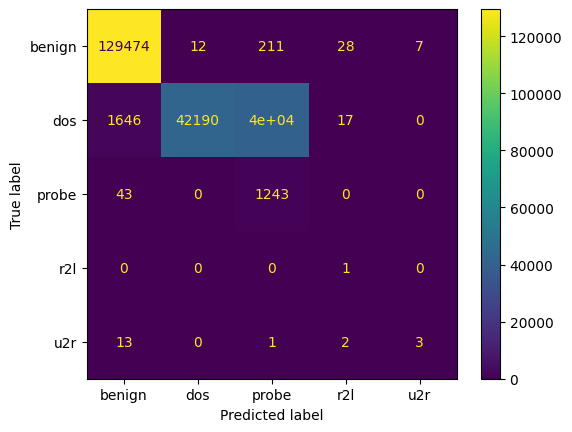

In [ ]:
print(results2,'\nError: ',error2)

disp2 = ConfusionMatrixDisplay(confusion_matrix=results2, display_labels=classifier_DT_std.classes_)
disp2.plot()
plt.show()


In [ ]:
precision_score(test_label_cat,pred_label_cat_std,average=None)

array([0.98702507, 0.99971565, 0.02990641, 0.02083333, 0.3       ])

In [ ]:
recall_score(test_label_cat,pred_label_cat_std,average=None)

array([0.99801128, 0.50249521, 0.96656299, 1.        , 0.15789474])

# Binary Decision Tree

In [ ]:
# Consider also simpler binary classification
train_label_cat_bin = train_label_cat.apply(lambda x: 'benign' if x == 'benign' else 'attack')
test_label_cat_bin = test_label_cat.apply(lambda x: 'benign' if x == 'benign' else 'attack')

t6 = time.monotonic()
classifier_DT_bin = DecisionTreeClassifier(criterion='entropy',random_state=42)
classifier_DT_bin.fit(train_data,train_label_cat_bin)
t7 = time.monotonic()
pred_label_cat_bin = classifier_DT_bin.predict(test_data)
t8 = time.monotonic()
results3 = confusion_matrix(test_label_cat_bin,pred_label_cat_bin)
error3 = zero_one_loss(test_label_cat_bin,pred_label_cat_bin)
print('\nTraining: ',(t7-t6),'seconds\nClassification: ',(t8-t7),'seconds')


Training:  10.934529522999924 seconds
Classification:  0.17652136900005644 seconds


[[ 84791    476]
 [    92 129640]] 
Error:  0.0026418727528965125


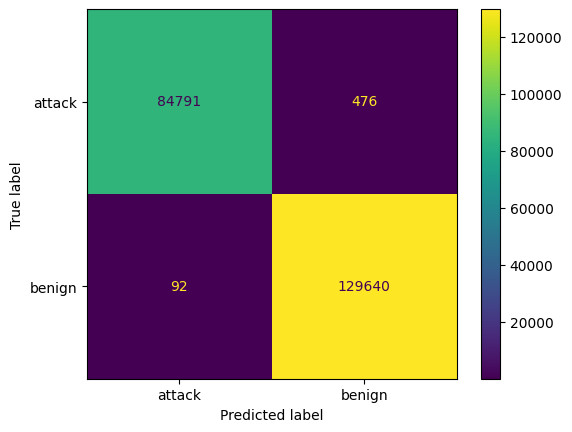

In [ ]:
print(results3,'\nError: ',error3)

disp3 = ConfusionMatrixDisplay(confusion_matrix=results3, display_labels=classifier_DT_bin.classes_)
disp3.plot()
plt.show()

In [ ]:
# For evaluating the precision, read the matrix by column
precision_score(test_label_cat_bin,pred_label_cat_bin,pos_label='benign')

0.996341725844631

In [ ]:
# For evaluating the recall, read the matrix by row
recall_score(test_label_cat_bin,pred_label_cat_bin,pos_label='benign')

In [ ]:
# Consider also simpler binary classification for standardized data
train_label_cat_bin = train_label_cat.apply(lambda x: 'benign' if x == 'benign' else 'attack')
test_label_cat_bin = test_label_cat.apply(lambda x: 'benign' if x == 'benign' else 'attack')

t6 = time.monotonic()
classifier_DT_bin_std = DecisionTreeClassifier(criterion='entropy',random_state=42)
classifier_DT_bin_std.fit(train_data_std,train_label_cat_bin)
t7 = time.monotonic()
pred_label_cat_bin_std = classifier_DT_bin_std.predict(test_data_std)
t8 = time.monotonic()
results3_std = confusion_matrix(test_label_cat_bin,pred_label_cat_bin_std)
error3_std = zero_one_loss(test_label_cat_bin,pred_label_cat_bin_std)
print('\nTraining: ',(t7-t6),'seconds\nClassification: ',(t8-t7),'seconds')


Training:  9.738606462000007 seconds
Classification:  0.12000068299994382 seconds


[[ 84791    476]
 [    92 129640]] 
Error:  0.0026418727528965125


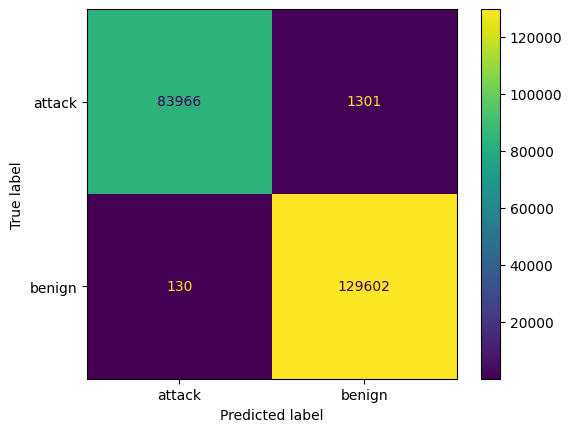

In [ ]:
print(results3,'\nError: ',error3)

disp3_std = ConfusionMatrixDisplay(confusion_matrix=results3_std, display_labels=classifier_DT_bin_std.classes_)
disp3_std.plot()
plt.show()

In [ ]:
# For evaluating the precision, read the matrix by column
precision_score(test_label_cat_bin,pred_label_cat_bin_std,pos_label='benign')

0.9900613431319374

In [ ]:
# For evaluating the recall, read the matrix by row
recall_score(test_label_cat_bin,pred_label_cat_bin_std,pos_label='benign')

0.9989979342028181

# KNN


Training:  3.2712118559999226 seconds
Classification:  2061.275845813 seconds
[[129638     14     77      2      1]
 [  1240  74854   7867      0      0]
 [    22      7   1257      0      0]
 [     0      0      0      1      0]
 [    10      0      1      0      8]] 
Error:  0.04298159526323375


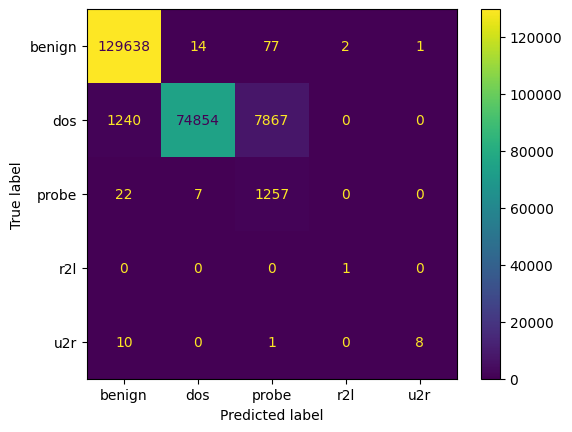

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

t9 = time.monotonic()
classifier_knn_1 = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
classifier_knn_1.fit(train_data,train_label_cat)
t10 = time.monotonic()
pred_label_cat_knn_1 = classifier_knn_1.predict(test_data)
t11 = time.monotonic()
results_knn_1 = confusion_matrix(test_label_cat, pred_label_cat_knn_1)
error_knn_1 = zero_one_loss(test_label_cat, pred_label_cat_knn_1)
print('\nTraining: ',(t10-t9),'seconds\nClassification: ',(t11-t10),'seconds')
print(results_knn_1,'\nError: ',error_knn_1)

disp_knn_1 = ConfusionMatrixDisplay(confusion_matrix=results_knn_1, display_labels=classifier_knn_1.classes_)
disp_knn_1.plot()
plt.show()

In [ ]:
import multiprocessing

cores = multiprocessing.cpu_count() # Count the number of cores in a computer
cores

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

In [ ]:
precision_score(test_label_cat,pred_label_cat_knn_1,average=None)

In [ ]:
recall_score(test_label_cat,pred_label_cat_knn_1,average=None)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

t12 = time.monotonic()
classifier_knn_2 = KNeighborsClassifier(n_neighbors=2, n_jobs=-1)
classifier_knn_2.fit(train_data,train_label_cat)
t13 = time.monotonic()
pred_label_cat_knn_2 = classifier_knn_2.predict(test_data)
t14 = time.monotonic()
results_knn_2 = confusion_matrix(test_label_cat, pred_label_cat_knn_2)
error_knn_2 = zero_one_loss(test_label_cat, pred_label_cat_knn_2)
print('\nTraining: ',(t13-t12),'seconds\nClassification: ',(t14-t13),'seconds')
print(results_knn_2,'\nError: ',error_knn_2)

disp_knn_2 = ConfusionMatrixDisplay(confusion_matrix=results_knn_2, display_labels=classifier_knn_2.classes_)
disp_knn_2.plot()
plt.show()

In [ ]:
precision_score(test_label_cat,pred_label_cat_knn_2,average=None)

In [ ]:
recall_score(test_label_cat,pred_label_cat_knn_2,average=None)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

t15 = time.monotonic()
classifier_knn_3 = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
classifier_knn_3.fit(train_data,train_label_cat)
t16 = time.monotonic()
pred_label_cat_knn_3 = classifier_knn_3.predict(test_data)
t17 = time.monotonic()
results_knn_3 = confusion_matrix(test_label_cat, pred_label_cat_knn_3)
error_knn_3 = zero_one_loss(test_label_cat, pred_label_cat_knn_3)
print('\nTraining: ',(t16-t15),'seconds\nClassification: ',(t17-t16),'seconds')
print(results_knn_3,'\nError: ',error_knn_3)

disp_knn_3 = ConfusionMatrixDisplay(confusion_matrix=results_knn_3, display_labels=classifier_knn_3.classes_)
disp_knn_3.plot()
plt.show()

In [ ]:
precision_score(test_label_cat,pred_label_cat_knn_3,average=None)

In [ ]:
recall_score(test_label_cat,pred_label_cat_knn_3,average=None)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

t15_5 = time.monotonic()
classifier_knn_5 = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
classifier_knn_5.fit(train_data,train_label_cat)
t16_5 = time.monotonic()
pred_label_cat_knn_5 = classifier_knn_5.predict(test_data)
t17_5 = time.monotonic()
results_knn_5 = confusion_matrix(test_label_cat, pred_label_cat_knn_5)
error_knn_5 = zero_one_loss(test_label_cat, pred_label_cat_knn_5)
print('\nTraining: ',(t16_5-t15_5),'seconds\nClassification: ',(t17_5-t16_5),'seconds')
print(results_knn_5,'\nError: ',error_knn_5)

disp_knn_5 = ConfusionMatrixDisplay(confusion_matrix=results_knn_5, display_labels=classifier_knn_5.classes_)
disp_knn_5.plot()
plt.show()

In [ ]:
precision_score(test_label_cat,pred_label_cat_knn_5,average=None)

In [ ]:
recall_score(test_label_cat,pred_label_cat_knn_5,average=None)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

t15_5_std = time.monotonic()
classifier_knn_5_std = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
classifier_knn_5_std.fit(train_data_std,train_label_cat)
t16_5_std = time.monotonic()
pred_label_cat_knn_5_std = classifier_knn_5_std.predict(test_data_std)
t17_5_std = time.monotonic()
results_knn_5_std = confusion_matrix(test_label_cat, pred_label_cat_knn_5_std)
error_knn_5_std = zero_one_loss(test_label_cat, pred_label_cat_knn_5_std)
print('\nTraining: ',(t16_5_std-t15_5_std),'seconds\nClassification: ',(t17_5_std-t16_5_std),'seconds')
print(results_knn_5_std,'\nError: ',error_knn_5_std)

disp_knn_5_std = ConfusionMatrixDisplay(confusion_matrix=results_knn_5_std, display_labels=classifier_knn_5_std.classes_)
disp_knn_5_std.plot()
plt.show()

In [ ]:
precision_score(test_label_cat,pred_label_cat_knn_5_std,average=None)

In [ ]:
recall_score(test_label_cat,pred_label_cat_knn_5_std,average=None)

# SVM approach

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, zero_one_loss, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

t18 = time.monotonic()
classifier_svc = LinearSVC(max_iter=2000)
# usare max_iter > 1000
classifier_svc.fit(train_data,train_label_cat)
t19 = time.monotonic()
pred_label_cat_svc = classifier_svc.predict(test_data)
t20 = time.monotonic()

results_svc = confusion_matrix(test_label_cat, pred_label_cat_svc)
error_svc = zero_one_loss(test_label_cat, pred_label_cat_svc)

print('\nTraining: ',(t19-t18),'seconds\nClassification: ',(t20-t19),'seconds')
print(results_svc,'\nError: ',error_svc)

disp_svc = ConfusionMatrixDisplay(confusion_matrix=results_svc, display_labels=classifier_svc.classes_)
disp_svc.plot()
plt.show()

In [ ]:
# Uso dati standardizzati
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, zero_one_loss, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

t18 = time.monotonic()
classifier_svc_std = LinearSVC(max_iter=2000)
# usare max_iter > 1000
classifier_svc_std.fit(train_data_std,train_label_cat)
t19 = time.monotonic()
pred_label_cat_svc_std = classifier_svc_std.predict(test_data_std)
t20 = time.monotonic()

results_svc_std = confusion_matrix(test_label_cat, pred_label_cat_svc_std)
error_svc_std = zero_one_loss(test_label_cat, pred_label_cat_svc_std)

print('\nTraining: ',(t19-t18),'seconds\nClassification: ',(t20-t19),'seconds')
print(results_svc_std,'\nError: ',error_svc_std)

disp_svc_std = ConfusionMatrixDisplay(confusion_matrix=results_svc_std, display_labels=classifier_svc_std.classes_)
disp_svc_std.plot()
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, zero_one_loss, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

t18 = time.monotonic()
classifier_svc_k = SVC()
#classifier_svc_k = SVC(class_weightdict=‘balanced’)
# usare max_iter > 1000
classifier_svc_k.fit(train_data_std,train_label_cat)
t19 = time.monotonic()
pred_label_cat_svc_k = classifier_svc_k.predict(test_data_std)
t20 = time.monotonic()

results_svc_k = confusion_matrix(test_label_cat, pred_label_cat_svc_k)
error_svc_k = zero_one_loss(test_label_cat, pred_label_cat_svc_k)

print('\nTraining: ',(t19-t18),'seconds\nClassification: ',(t20-t19),'seconds')
print(results_svc,'\nError: ',error_svc)

disp_svc_k = ConfusionMatrixDisplay(confusion_matrix=results_svc_k, display_labels=classifier_svc_k.classes_)
disp_svc_k.plot()
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

t21 = time.monotonic()
#classifier_rf = RandomForestClassifier(criterion='entropy', random_state=10)
classifier_rf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
classifier_rf.fit(train_data,train_label_cat)
t22 = time.monotonic()
pred_label_cat_rf = classifier_rf.predict(test_data)
t23 = time.monotonic()

results_rf = confusion_matrix(test_label_cat, pred_label_cat_rf)
error_rf = zero_one_loss(test_label_cat, pred_label_cat_rf)

print('\nTraining: ',(t22-t21),'seconds\nClassification: ',(t23-t22),'seconds')
print(results_rf,'\nError: ',error_rf)

disp_rf = ConfusionMatrixDisplay(confusion_matrix=results_rf, display_labels=classifier_rf.classes_)
disp_rf.plot()
plt.show()

In [ ]:
# For evaluating the precision, read the matrix by column
precision_score(test_label_cat,pred_label_cat_rf,average=None)

In [ ]:
precision_score(test_label_cat,pred_label_cat_rf,average='micro')

In [ ]:
# For evaluating the recall, read the matrix by row
recall_score(test_label_cat,pred_label_cat_rf,average=None)

In [ ]:
recall_score(test_label_cat,pred_label_cat_rf,average='micro')


Training:  75.23368880200002 seconds
Classification:  2.0790707610000254 seconds
[[ 85198     69]
 [   199 129533]] 
Error:  0.0012465174256623968


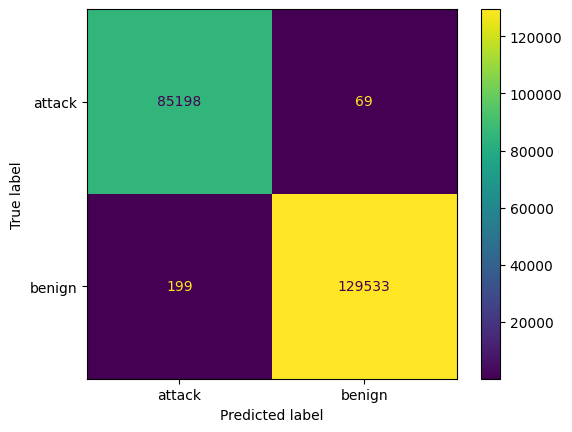

In [ ]:
from sklearn.ensemble import RandomForestClassifier

t24 = time.monotonic()
#classifier_rf = RandomForestClassifier(criterion='entropy', random_state=10)
classifier_rf_bin = RandomForestClassifier(n_estimators=101, criterion='entropy', random_state=42)
classifier_rf_bin.fit(train_data_std,train_label_cat_bin)
t25 = time.monotonic()
pred_label_cat_rf_bin = classifier_rf_bin.predict(test_data_std)
t26 = time.monotonic()

results_rf_bin = confusion_matrix(test_label_cat_bin, pred_label_cat_rf_bin)
error_rf_bin = zero_one_loss(test_label_cat_bin, pred_label_cat_rf_bin)

print('\nTraining: ',(t25-t24),'seconds\nClassification: ',(t26-t25),'seconds')
print(results_rf_bin,'\nError: ',error_rf_bin)

disp_rf_bin = ConfusionMatrixDisplay(confusion_matrix=results_rf_bin, display_labels=classifier_rf_bin.classes_)
disp_rf_bin.plot()
plt.show()

In [ ]:
precision_score(test_label_cat_bin,pred_label_cat_rf_bin,average=None)

In [ ]:
recall_score(test_label_cat_bin,pred_label_cat_rf_bin,average=None)

In [ ]:
#train_data.drop('attack',axis=1,inplace=True)
train_data.shape


In [ ]:
train_data[numeric_column].head(20)

# Hierarchical classification

In [ ]:
new_train_attack = train_data
new_train_attack.insert(new_train_attack.shape[1], 'attack', train_label_cat, True)
new_train_attack.shape


NameError: ignored

In [ ]:
new_train_attack.head().transpose()

In [ ]:
# df = df.drop(df[df.score < 50].index)

new_train_attack = new_train_attack.drop(new_train_attack[new_train_attack.attack == 'benign'].index)
#new_train_attack.drop(new_train_attack[new_train_attack.attack < 50].index, inplace=True)

new_train_attack.head().transpose()


In [ ]:
new_train_attack.shape



In [ ]:
label_attack=new_train_attack['attack']
new_train_attack=new_train_attack.drop(['attack'],axis=1)

In [ ]:
label_attack.shape

In [ ]:
new_train_attack.shape

In [ ]:
new_test_attack = test_data
new_test_attack.insert(new_test_attack.shape[1], 'attack', pred_label_cat_rf_bin, True)
new_test_attack.shape

NameError: ignored

In [ ]:
new_test_attack.insert(new_test_attack.shape[1], 'labels', test_label_cat, True)
new_test_attack.shape

In [ ]:
new_test_attack.head().transpose()

In [ ]:
new_test_attack = new_test_attack.drop(new_test_attack[new_test_attack.attack == 'benign'].index)
new_test_attack.head().transpose()

NameError: ignored

In [ ]:
new_test_attack.shape

In [ ]:
# adesso elimino la colonna 'attack' e poi stacco le etichette reali, così ho il dataset di test che emula
# l'output del mio classificatore binario

In [ ]:
new_test_attack=new_test_attack.drop(['attack'],axis=1)
label_attack_final=new_test_attack['labels']
new_test_attack=new_test_attack.drop(['labels'],axis=1)
new_test_attack.shape

NameError: ignored

In [ ]:
cc=train_label_cat_bin.value_counts()
#dd=pred_label_cat_rf_bin.value_counts()
print(cc)

In [ ]:
dd=test_label_cat_bin.value_counts()
print(dd)

In [ ]:
ee=pd.Series(pred_label_cat_rf_bin).value_counts()
print(ee)

In [ ]:
kk=test_label_cat.value_counts()
print(kk)

In [ ]:
t27 = time.monotonic()
#classifier_rf = RandomForestClassifier(criterion='entropy', random_state=10)
classifier_rf_attack = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=44)
classifier_rf_attack.fit(new_train_attack,label_attack)
t28 = time.monotonic()
pred_label_cat_rf_attack = classifier_rf_attack.predict(new_test_attack)
t29 = time.monotonic()

results_rf_attack = confusion_matrix(label_attack_final, pred_label_cat_rf_attack)
error_rf_attack = zero_one_loss(label_attack_final, pred_label_cat_rf_attack)

etichette=['benign', 'dos', 'probe', 'r2l', 'u2r']

print('\nTraining: ',(t28-t27),'seconds\nClassification: ',(t29-t28),'seconds')
print(results_rf_attack,'\nError: ',error_rf_attack)

disp_rf_attack = ConfusionMatrixDisplay(confusion_matrix=results_rf_attack, display_labels=etichette)
disp_rf_attack.plot()
plt.show()

In [ ]:
print(label_attack_final.value_counts())

In [ ]:
uu = pd.Series(pred_label_cat_rf_attack).value_counts()
print(uu)

In [ ]:
print(label_attack.value_counts())

In [ ]:
t30 = time.monotonic()
classifier_knn_4 = KNeighborsClassifier(n_neighbors=2, n_jobs=-1)
classifier_knn_4.fit(new_train_attack,label_attack)
t31 = time.monotonic()
pred_label_cat_knn_4 = classifier_knn_4.predict(new_test_attack)
t32 = time.monotonic()
results_knn_4 = confusion_matrix(label_attack_final, pred_label_cat_knn_4)
error_knn_4 = zero_one_loss(label_attack_final, pred_label_cat_knn_4)
print('\nTraining: ',(t31-t30),'seconds\nClassification: ',(t32-t31),'seconds')
print(results_knn_4,'\nError: ',error_knn_4)

etichette=['benign', 'dos', 'probe', 'r2l', 'u2r']

disp_knn_4 = ConfusionMatrixDisplay(confusion_matrix=results_knn_4, display_labels=etichette)
disp_knn_4.plot()
plt.show()

In [ ]:
precision_score(label_attack_final, pred_label_cat_knn_4,average=None)

In [ ]:
recall_score(label_attack_final, pred_label_cat_knn_4,average=None)